In [74]:

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# New Section

In [61]:
# Load the CSV data file
df = pd.read_csv("/content/train_test_pgd (1).csv")
df.set_index('Date',inplace=True)

In [62]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,539.900024,542.500000,535.700012,536.750000,531.990540,7642793
2020-01-02,536.000000,541.900024,535.849976,540.599976,535.806335,10264223
2020-01-03,538.000000,540.799988,536.250000,538.849976,534.071838,9594690
2020-01-06,537.250000,537.250000,523.799988,525.700012,521.038513,12534334
2020-01-07,531.299988,535.599976,521.650024,522.900024,518.263306,16101835
...,...,...,...,...,...,...
2022-12-26,881.099976,897.000000,875.250000,893.200012,893.200012,6943159
2022-12-27,897.700012,902.750000,888.200012,900.650024,900.650024,4994381
2022-12-28,896.000000,903.950012,895.799988,898.950012,898.950012,8980300


In [63]:
df['Forecast']= df['Close'].shift(-1)

In [64]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Forecast
Date,,,,,,,
2022-12-26,881.099976,897.000000,875.250000,893.200012,893.200012,6943159,900.650024
2022-12-27,897.700012,902.750000,888.200012,900.650024,900.650024,4994381,898.950012
2022-12-28,896.000000,903.950012,895.799988,898.950012,898.950012,8980300,908.049988
2022-12-29,897.900024,923.349976,889.349976,908.049988,908.049988,11994220,890.849976
2022-12-30,908.500000,908.500000,888.549988,890.849976,890.849976,9688527,NaN


In [65]:
df.shape

(747, 7)

In [66]:
df.isnull()

,Open,High,Low,Close,Adj Close,Volume,Forecast
Date,,,,,,,
2020-01-01,False,False,False,False,False,False,False
2020-01-02,False,False,False,False,False,False,False
2020-01-03,False,False,False,False,False,False,False
2020-01-06,False,False,False,False,False,False,False
2020-01-07,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2022-12-26,False,False,False,False,False,False,False
2022-12-27,False,False,False,False,False,False,False
2022-12-28,False,False,False,False,False,False,False


In [67]:
df= df.drop('2022-12-30')

In [68]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Forecast
Date,,,,,,,
2022-12-23,883.049988,889.650024,875.299988,878.900024,878.900024,11059215,893.200012
2022-12-26,881.099976,897.000000,875.250000,893.200012,893.200012,6943159,900.650024
2022-12-27,897.700012,902.750000,888.200012,900.650024,900.650024,4994381,898.950012
2022-12-28,896.000000,903.950012,895.799988,898.950012,898.950012,8980300,908.049988
2022-12-29,897.900024,923.349976,889.349976,908.049988,908.049988,11994220,890.849976


In [69]:
X= df[['Open','Low','High']]
y= df['Forecast']

In [70]:
Xtrain=X[:600]

ytrain=y[:600]

X_test=X[600:]
y_test=y[600:]





In [76]:
# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(Xtrain, ytrain)



LinearRegression()

In [77]:
model.score(Xtrain,ytrain)

0.9930794311983154

In [ ]:
ypred = model.predict(X_test)
df_pred = pd.DataFrame(y_test.values, columns=['Actual'], index=y_test.index)
df_pred['Predicted'] = ypred

In [80]:
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
rmse


16.4884534401188

In [ ]:
# Predict the Close value for the test data
y_pred = model.predict(X_test)


In [ ]:
# Print the accuracy score
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.980143992960772


In [ ]:
df_pred["Difference"]=(df_pred["Actual"]-df_pred["Predicted"])*100/df_pred["Actual"]

In [ ]:
df_pred.tail()

,Actual,Predicted,Difference
Date,,,
2022-12-23,893.200012,882.574784,1.189569
2022-12-26,900.650024,888.118795,1.391354
2022-12-27,898.950012,894.656046,0.477665
2022-12-28,908.049988,903.183756,0.535899
2022-12-29,890.849976,908.372505,-1.966945


<Axes: xlabel='Date'>

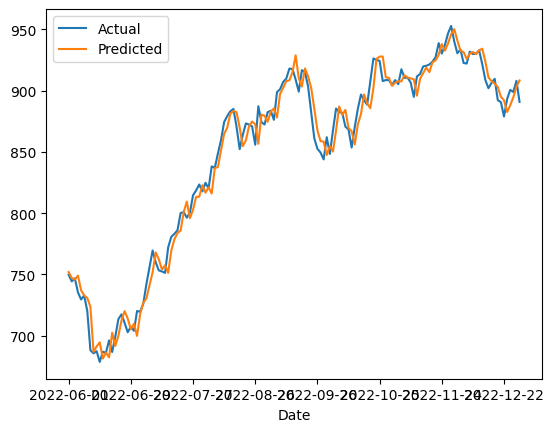

In [ ]:
#validation
df_pred[['Actual','Predicted']].plot()

In [ ]:
# Load the new data
df1 = pd.read_csv("/content/validation_pgd (1).csv")

In [ ]:
df1

,Date,Open,High,Low,Adj Close,Volume
0,2023-01-02,894.000000,907.000000,894.000000,902.450012,4315403
1,2023-01-03,898.500000,905.950012,896.750000,901.349976,5846855
2,2023-01-04,899.000000,907.900024,894.799988,899.099976,12454582
3,2023-01-05,900.900024,903.000000,872.000000,879.150024,16547196
4,2023-01-06,878.950012,878.950012,860.500000,870.099976,14804613
5,2023-01-09,874.250000,878.750000,862.299988,873.349976,16811853
6,2023-01-10,875.400024,878.400024,856.599976,861.349976,13470142
7,2023-01-11,862.900024,870.849976,854.849976,866.299988,15558460
8,2023-01-12,865.500000,869.349976,854.950012,860.650024,16659001
9,2023-01-13,864.700012,874.900024,858.299988,873.450012,11223103


In [ ]:
#axis=1 full column drop
df1= df1.drop(['Adj Close','Volume'], axis=1)

In [ ]:
df1

,Date,Open,High,Low
0,2023-01-02,894.000000,907.000000,894.000000
1,2023-01-03,898.500000,905.950012,896.750000
2,2023-01-04,899.000000,907.900024,894.799988
3,2023-01-05,900.900024,903.000000,872.000000
4,2023-01-06,878.950012,878.950012,860.500000
5,2023-01-09,874.250000,878.750000,862.299988
6,2023-01-10,875.400024,878.400024,856.599976
7,2023-01-11,862.900024,870.849976,854.849976
8,2023-01-12,865.500000,869.349976,854.950012
9,2023-01-13,864.700012,874.900024,858.299988


In [ ]:
#prediction
df1_pred=model.predict(X_test)
df1_pred

array([751.92280028, 747.01818243, 745.77091105, 748.987806  ,
       737.03361835, 732.80106216, 730.74799355, 723.52163692,
       686.74256957, 691.16160638, 694.46179964, 681.2794915 ,
       686.11236081, 682.24802248, 702.34442196, 691.57450697,
       699.83875708, 712.36279624, 719.97700608, 713.96315946,
       705.1256721 , 709.73962646, 699.74220055, 717.64564111,
       726.89819675, 730.30301986, 740.93984063, 751.67660245,
       767.90794544, 762.34690415, 753.92154014, 757.45427594,
       751.26070323, 769.23919934, 778.64228778, 783.7851437 ,
       785.66001751, 800.87206335, 809.40599517, 795.90131012,
       802.72389914, 813.32333795, 813.43857608, 822.83086143,
       816.71848352, 821.03968773, 816.05080913, 836.68319661,
       837.71869415, 851.39340122, 864.77052498, 869.74340592,
       881.22101548, 883.46871781, 882.42722678, 869.87297411,
       854.72422011, 859.5989841 , 870.89338747, 874.8426993 ,
       872.48699032, 856.5804203 , 880.48359968, 879.56

In [ ]:
#ovi is cute
#how to convert from array to ?
#decision tree model
#any other model which is easier than RF
#if possible click cute code pics

In [78]:
model = LinearRegression()
model.fit(X_train, y_train)

NameError: ignored

In [79]:
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
rmse

16.4884534401188

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9999313766161186


MODEL 2: Decision Tree

In [91]:
# Import necessary libraries

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [92]:
# Load the dataset
dt = pd.read_csv('/content/train_test_pgd (1).csv')
dt.set_index('Date',inplace=True)
dt

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,539.900024,542.500000,535.700012,536.750000,531.990540,7642793
2020-01-02,536.000000,541.900024,535.849976,540.599976,535.806335,10264223
2020-01-03,538.000000,540.799988,536.250000,538.849976,534.071838,9594690
2020-01-06,537.250000,537.250000,523.799988,525.700012,521.038513,12534334
2020-01-07,531.299988,535.599976,521.650024,522.900024,518.263306,16101835
...,...,...,...,...,...,...
2022-12-26,881.099976,897.000000,875.250000,893.200012,893.200012,6943159
2022-12-27,897.700012,902.750000,888.200012,900.650024,900.650024,4994381
2022-12-28,896.000000,903.950012,895.799988,898.950012,898.950012,8980300


In [93]:
# Separate features and target variable
dt['Forecast']= dt['Close'].shift(-1)

In [94]:
dt

,Open,High,Low,Close,Adj Close,Volume,Forecast
Date,,,,,,,
2020-01-01,539.900024,542.500000,535.700012,536.750000,531.990540,7642793,540.599976
2020-01-02,536.000000,541.900024,535.849976,540.599976,535.806335,10264223,538.849976
2020-01-03,538.000000,540.799988,536.250000,538.849976,534.071838,9594690,525.700012
2020-01-06,537.250000,537.250000,523.799988,525.700012,521.038513,12534334,522.900024
2020-01-07,531.299988,535.599976,521.650024,522.900024,518.263306,16101835,525.950012
...,...,...,...,...,...,...,...
2022-12-26,881.099976,897.000000,875.250000,893.200012,893.200012,6943159,900.650024
2022-12-27,897.700012,902.750000,888.200012,900.650024,900.650024,4994381,898.950012
2022-12-28,896.000000,903.950012,895.799988,898.950012,898.950012,8980300,908.049988


In [95]:
dt.tail()

,Open,High,Low,Close,Adj Close,Volume,Forecast
Date,,,,,,,
2022-12-26,881.099976,897.000000,875.250000,893.200012,893.200012,6943159,900.650024
2022-12-27,897.700012,902.750000,888.200012,900.650024,900.650024,4994381,898.950012
2022-12-28,896.000000,903.950012,895.799988,898.950012,898.950012,8980300,908.049988
2022-12-29,897.900024,923.349976,889.349976,908.049988,908.049988,11994220,890.849976
2022-12-30,908.500000,908.500000,888.549988,890.849976,890.849976,9688527,NaN


In [96]:
dt.shape

(747, 7)

In [97]:
dt.isnull()

,Open,High,Low,Close,Adj Close,Volume,Forecast
Date,,,,,,,
2020-01-01,False,False,False,False,False,False,False
2020-01-02,False,False,False,False,False,False,False
2020-01-03,False,False,False,False,False,False,False
2020-01-06,False,False,False,False,False,False,False
2020-01-07,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2022-12-26,False,False,False,False,False,False,False
2022-12-27,False,False,False,False,False,False,False
2022-12-28,False,False,False,False,False,False,False


In [98]:
dt= dt.drop('2022-12-30')

In [99]:
dt.tail()

,Open,High,Low,Close,Adj Close,Volume,Forecast
Date,,,,,,,
2022-12-23,883.049988,889.650024,875.299988,878.900024,878.900024,11059215,893.200012
2022-12-26,881.099976,897.000000,875.250000,893.200012,893.200012,6943159,900.650024
2022-12-27,897.700012,902.750000,888.200012,900.650024,900.650024,4994381,898.950012
2022-12-28,896.000000,903.950012,895.799988,898.950012,898.950012,8980300,908.049988
2022-12-29,897.900024,923.349976,889.349976,908.049988,908.049988,11994220,890.849976


In [135]:
#high-low open-close
X= dt[['Open','High','Low']]
Y= dt['Forecast']

In [136]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,random_state = False)

In [137]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [103]:
y_pred = model.predict(X_test)
metrics.r2_score(Y_test,y_pred)
#R2 score shows much of the variation of a dependent variable is explained by an independent variable in a regression model.

0.990247998781668

In [104]:
model

DecisionTreeRegressor()

In [105]:
dt_pred = pd.DataFrame(Y_test.values, columns=['Actual'], index=Y_test.index)
dt_pred['Predicted'] = y_pred

In [106]:
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
rmse

17.14721767445323

In [107]:
mae = mean_absolute_error(Y_test, y_pred)
mae

12.579665934244794

In [138]:
# Load the new data(Validation)
dt1 = pd.read_csv("/content/validation_pgd (1).csv")

In [109]:
dt1

,Date,Open,High,Low,Adj Close,Volume
0,2023-01-02,894.000000,907.000000,894.000000,902.450012,4315403
1,2023-01-03,898.500000,905.950012,896.750000,901.349976,5846855
2,2023-01-04,899.000000,907.900024,894.799988,899.099976,12454582
3,2023-01-05,900.900024,903.000000,872.000000,879.150024,16547196
4,2023-01-06,878.950012,878.950012,860.500000,870.099976,14804613
5,2023-01-09,874.250000,878.750000,862.299988,873.349976,16811853
6,2023-01-10,875.400024,878.400024,856.599976,861.349976,13470142
7,2023-01-11,862.900024,870.849976,854.849976,866.299988,15558460
8,2023-01-12,865.500000,869.349976,854.950012,860.650024,16659001
9,2023-01-13,864.700012,874.900024,858.299988,873.450012,11223103


In [139]:
#axis=1 full column drop
dt1= dt1.drop(['Adj Close','Volume'], axis=1)

In [129]:
dt1

,Date,Open,High,Low
0,2023-01-02,894.000000,907.000000,894.000000
1,2023-01-03,898.500000,905.950012,896.750000
2,2023-01-04,899.000000,907.900024,894.799988
3,2023-01-05,900.900024,903.000000,872.000000
4,2023-01-06,878.950012,878.950012,860.500000
5,2023-01-09,874.250000,878.750000,862.299988
6,2023-01-10,875.400024,878.400024,856.599976
7,2023-01-11,862.900024,870.849976,854.849976
8,2023-01-12,865.500000,869.349976,854.950012
9,2023-01-13,864.700012,874.900024,858.299988


In [125]:
X

,High,Low,Open
Date,,,
2020-01-01,542.500000,535.700012,539.900024
2020-01-02,541.900024,535.849976,536.000000
2020-01-03,540.799988,536.250000,538.000000
2020-01-06,537.250000,523.799988,537.250000
2020-01-07,535.599976,521.650024,531.299988
...,...,...,...
2022-12-23,889.650024,875.299988,883.049988
2022-12-26,897.000000,875.250000,881.099976
2022-12-27,902.750000,888.200012,897.700012


In [126]:
dt1_pred

array([870.59997559, 796.29998779, 531.04998779, 536.45001221,
       380.6000061 , 374.70001221, 610.5       , 363.        ,
       927.45001221, 540.59997559, 541.59997559, 640.25      ,
       650.25      , 361.3999939 , 512.45001221, 931.90002441,
       682.70001221, 835.        , 709.95001221, 363.        ,
       630.90002441, 931.90002441, 608.04998779, 676.59997559,
       736.70001221, 511.5       , 373.1000061 , 375.54998779,
       707.20001221, 727.20001221, 549.29998779, 532.20001221,
       755.70001221, 906.45001221, 900.65002441, 700.20001221,
       569.95001221, 755.70001221, 762.25      , 752.20001221,
       586.40002441, 823.75      , 480.45001221, 535.59997559,
       780.90002441, 741.79998779, 720.09997559, 823.40002441,
       688.04998779, 534.84997559, 762.90002441, 686.59997559,
       582.09997559, 709.95001221, 591.54998779, 916.75      ,
       709.95001221, 414.6000061 , 602.79998779, 696.15002441,
       792.5       , 528.79998779, 327.3999939 , 364.04

In [140]:
#prediction
dt1.set_index('Date',inplace=True)
dt1_pred=model.predict(dt1)
dt1_pred

array([911.70001221, 908.04998779, 911.70001221, 898.95001221,
       852.54998779, 852.54998779, 852.54998779, 872.34997559,
       863.90002441, 852.54998779, 852.54998779, 863.90002441,
       879.25      , 853.59997559, 870.84997559, 852.25      ,
       898.79998779, 849.5       , 835.        , 796.29998779])

In [134]:
X

,High,Low,Open
Date,,,
2020-01-01,542.500000,535.700012,539.900024
2020-01-02,541.900024,535.849976,536.000000
2020-01-03,540.799988,536.250000,538.000000
2020-01-06,537.250000,523.799988,537.250000
2020-01-07,535.599976,521.650024,531.299988
...,...,...,...
2022-12-23,889.650024,875.299988,883.049988
2022-12-26,897.000000,875.250000,881.099976
2022-12-27,902.750000,888.200012,897.700012


In [143]:
dt1_pred = pd.DataFrame(dt1_pred)

In [144]:
dt1_pred

,0
0,911.700012
1,908.049988
2,911.700012
3,898.950012
4,852.549988
5,852.549988
6,852.549988
7,872.349976
8,863.900024
9,852.549988


In [146]:
dt1_pred.to_csv('PredValidation.csv')